In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_colwidth', None)

import string
import keras

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Kaggle'
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Kaggle/mtsamples.csv')

In [ ]:
df.head(10)

Unnamed: 0  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 keywords
0           0  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,
1           1  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic, band, loss, diets, overweight, lost
2           2  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, gastric, bypass, heart, pounds, weight,
3           3  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
import matplotlib.pyplot as plt
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

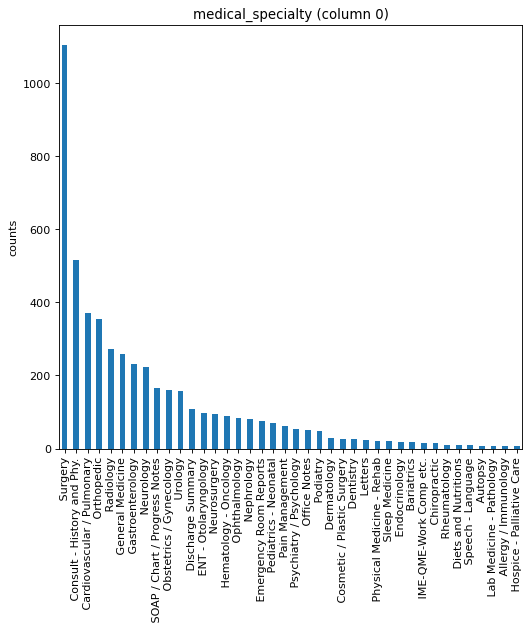

In [ ]:
plotPerColumnDistribution(df, 20,15)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

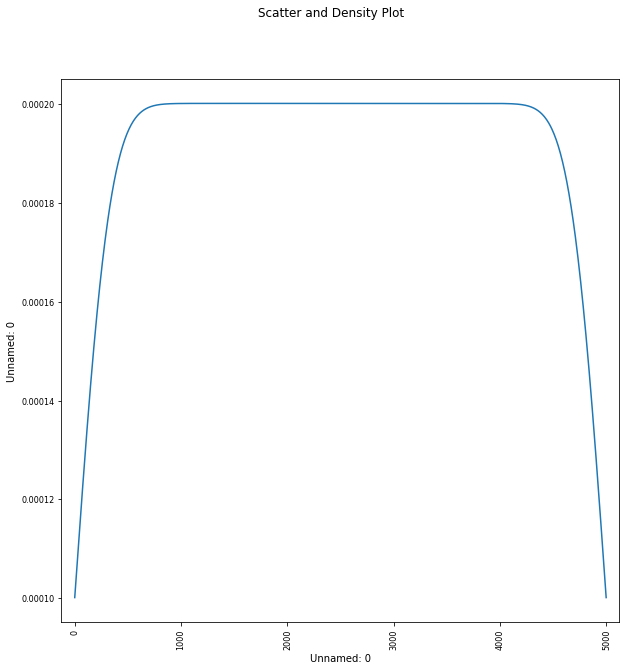

In [ ]:
plotScatterMatrix(df, 10,5)

# create  a new column with only lower case transcription without numerics

In [ ]:
no_punc_translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
df['transcription_lower']=df['transcription'].apply(lambda x: ' '.join([i for i in str(x).lower().translate(no_punc_translator).split(' ') if i.isalpha()]))

In [ ]:
df.head(1)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,transcription_lower
0,0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tried Claritin, and Zyrtec. Both worked for short time but then seemed to lose effectiveness. She has used Allegra also. She used that last summer and she began using it again two weeks ago. It does not appear to be working very well. She has used over-the-counter sprays but no prescription nasal sprays. She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals: Weight was 130 pounds and blood pressure 124/78.,HEENT: Her throat was mildly erythematous without exudate. Nasal mucosa was erythematous and swollen. Only clear drainage was seen. TMs were clear.,Neck: Supple without adenopathy.,Lungs: Clear.,ASSESSMENT:, Allergic rhinitis.,PLAN:,1. She will try Zyrtec instead of Allegra again. Another option will be to use loratadine. She does not think she has prescription coverage so that might be cheaper.,2. Samples of Nasonex two sprays in each nostril given for three weeks. A prescription was written as well.","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,",subjective this year old white female presents with complaint of allergies she used to have allergies when she lived in seattle but she thinks they are worse here in the past she has tried claritin and zyrtec both worked for short time but then seemed to lose effectiveness she has used allegra also she used that last summer and she began using it again two weeks ago it does not appear to be working very well she has used over the counter sprays but no prescription nasal sprays she does have asthma but doest not require daily medication for this and does not think it is flaring up medications her only medication currently is ortho tri cyclen and the allegra allergies she has no known medicine allergies objective vitals weight was pounds and blood pressure heent her throat was mildly erythematous without exudate nasal mucosa was erythematous and swollen only clear drainage was seen tms were clear neck supple without adenopathy lungs clear assessment allergic rhinitis plan she will try zyrtec instead of allegra again another option will be to use loratadine she does not think she has prescription coverage so that might be cheaper samples of nasonex two sprays in each nostril given for three weeks a prescription was written as well


# check number of target classes

In [ ]:
df['medical_specialty'].nunique()

40

In [ ]:
df['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

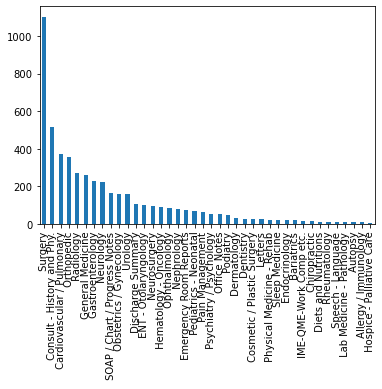

In [ ]:
df['medical_specialty'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
vectorizer=CountVectorizer(analyzer='word')
feature_space=vectorizer.fit_transform(list(df['transcription_lower']))

In [ ]:
count_vect_df = pd.DataFrame(feature_space.todense(), columns=vectorizer.get_feature_names())
new_df=pd.concat([df, count_vect_df], axis=1)

In [ ]:
new_df.columns

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords', 'transcription_lower', 'aa', 'aaaa', 'ab',
       ...
       'zung', 'zygoma', 'zygomatic', 'zyloprim', 'zymar', 'zyprexa', 'zyrtec',
       'zyvox', 'µiu', 'µl'],
      dtype='object', length=20925)

# select the columns only from Count Vectorized transcript texts

In [ ]:
X=new_df.loc[:, 'aa':]


lb_make = LabelEncoder()
new_df["medical_specialty_code"] = lb_make.fit_transform(new_df["medical_specialty"])


Y=new_df['medical_specialty_code']

In [ ]:
X


,aa,aaaa,ab,abadeedleedlebadle,abandoned,abandonment,abated,abbott,abbreviated,abc,abcd,abcde,abcg,abciximab,abd,abdomen,abdominal,abdominally,abdominis,abdominopelvic,abdominoplasty,abdominosacrocolpopexy,abdominus,abds,abduct,abducted,abduction,abducto,abductor,abductors,abductovalgus,abductus,aberrant,aberration,abf,abg,abgs,abilify,abilities,ability,...,zero,zeroed,zestril,zeta,zetia,ziac,ziagen,zicam,zig,zigzag,zimmer,zinc,zinging,zithromax,zithromycin,zocor,zofran,zoladex,zoloft,zolpidem,zometa,zone,zonegran,zones,zoonotic,zoster,zostrix,zosyn,zuba,zumi,zung,zygoma,zygomatic,zyloprim,zymar,zyprexa,zyrtec,zyvox,µiu,µl
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X

,aa,aaaa,ab,abadeedleedlebadle,abandoned,abandonment,abated,abbott,abbreviated,abc,...,zung,zygoma,zygomatic,zyloprim,zymar,zyprexa,zyrtec,zyvox,µiu,µl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(4999, 20919)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Converting medical_specialty to Categorical 

In [ ]:
y_train=keras.utils.to_categorical(y_train, df['medical_specialty'].nunique())
y_test=keras.utils.to_categorical(y_test, df['medical_specialty'].nunique())

In [ ]:
print(X_train.shape)
# print(X_train[0])

print(y_train.shape)
print(y_train[0])

(3999, 20918)
(3999, 40)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint

In [ ]:
def build_sequential(input_size, output_size):
    model=Sequential()
    model.add(Dense(1024, input_shape=(input_size, )   ))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(output_size)))
    model.add(Activation('softmax'))
    return model

In [ ]:
def build_sequential1(input_size, output_size):
    model=Sequential()
    model.add(
       Embedding(
          input_dim=input_size, output_dim=output_size  )
     )
    model.add(
     Bidirectional(
        LSTM(128, return_sequences=True, recurrent_dropout=0.1)
        )
    )
    model.add(
        TimeDistributed(
            Dense(output_size, activation='softmax')
      )
    )
    return model

In [ ]:
class config():
    VOCAB = 3999
    MAX_LEN = 20918
    N_OUPUT = 40
    
    
    EMBEDDING_VECTOR_LENGTH = 64
    N_LSTM_CELLS = 128
    RECURRENT_DROPOUT = 0.1
    
    OUTPUT_ACTIVATION = 'softmax'
    
    LOSS = 'categorical_crossentropy'
    OPTIMIZER = 'adam'
    METRICS = ['accuracy']
    
    MAX_EPOCHS = 10
    

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Embedding,TimeDistributed, LSTM, Dropout, Bidirectional, Dense 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model, to_categorical

# feature generation with Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=10000)
tfidf_feature_space = tfidf_vect.fit_transform(df['transcription_lower'])
tfidf_vect_df = pd.DataFrame(tfidf_feature_space.todense(), columns=tfidf_vect.get_feature_names())
tfidf_df=pd.concat([df, tfidf_vect_df], axis=1)

X_tfidf=tfidf_df.loc[:, 'abc':]
encoder = LabelEncoder()
tfidf_df["medical_specialty_code"] = encoder.fit_transform(tfidf_df["medical_specialty"])
Y_tfidf=tfidf_df['medical_specialty_code']

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, Y_tfidf, test_size=0.2, random_state=42)

y_train_tfidf=keras.utils.to_categorical(y_train_tfidf, df['medical_specialty'].nunique())
y_test_tfidf=keras.utils.to_categorical(y_test_tfidf, df['medical_specialty'].nunique())

model = build_sequential(X_train_tfidf.shape[1], encoder.classes_)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
plot_model(model, show_shapes=True)

batch_size=100
epochs=80

# checkpoint=ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only=False, mode='auto')

history=model.fit(np.array(X_train_tfidf), np.array(y_train_tfidf), batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              10236928  
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                41000     
_________________________________________________________________
activation_1 (Activation)    (None, 40)                0         
Total params: 10,277,928
Trainable params: 10,277,928
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
28/28 [==============================] - 4s 137ms/step - loss: 3.4119 - accuracy: 0.2092 - val_loss

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=10000)
tfidf_feature_space = tfidf_vect.fit_transform(df['transcription_lower'])
tfidf_vect_df = pd.DataFrame(tfidf_feature_space.todense(), columns=tfidf_vect.get_feature_names())
tfidf_df=pd.concat([df, tfidf_vect_df], axis=1)

X_tfidf=tfidf_df.loc[:, 'abc':]
encoder = LabelEncoder()
tfidf_df["medical_specialty_code"] = encoder.fit_transform(tfidf_df["medical_specialty"])
Y_tfidf=tfidf_df['medical_specialty_code']

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, Y_tfidf, test_size=0.2, random_state=42)

y_train_tfidf=keras.utils.to_categorical(y_train_tfidf, df['medical_specialty'].nunique())
y_test_tfidf=keras.utils.to_categorical(y_test_tfidf, df['medical_specialty'].nunique())

model = build_sequential(X_train_tfidf.shape[1], encoder.classes_)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
plot_model(model, show_shapes=True)

batch_size=100
epochs=80

# checkpoint=ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only=False, mode='auto')

history=model.fit(np.array(X_train_tfidf), np.array(y_train_tfidf), batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.3)

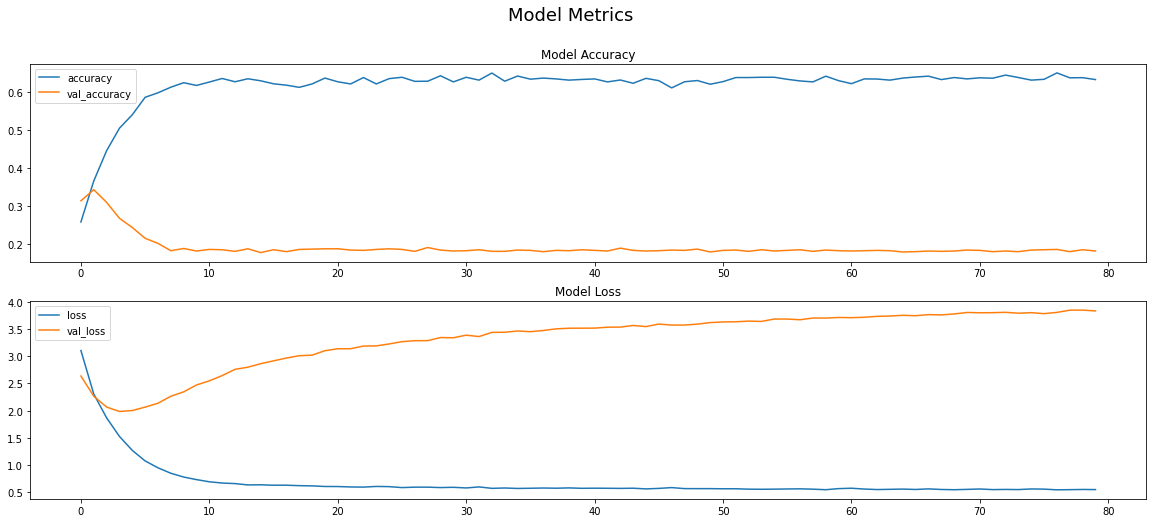

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(20, 8))
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(ax=ax[0])
df[['loss', 'val_loss']].plot(ax=ax[1])
ax[0].set_title('Model Accuracy', fontsize=12)
ax[1].set_title('Model Loss', fontsize=12)
fig.suptitle('Model Metrics', fontsize=18);

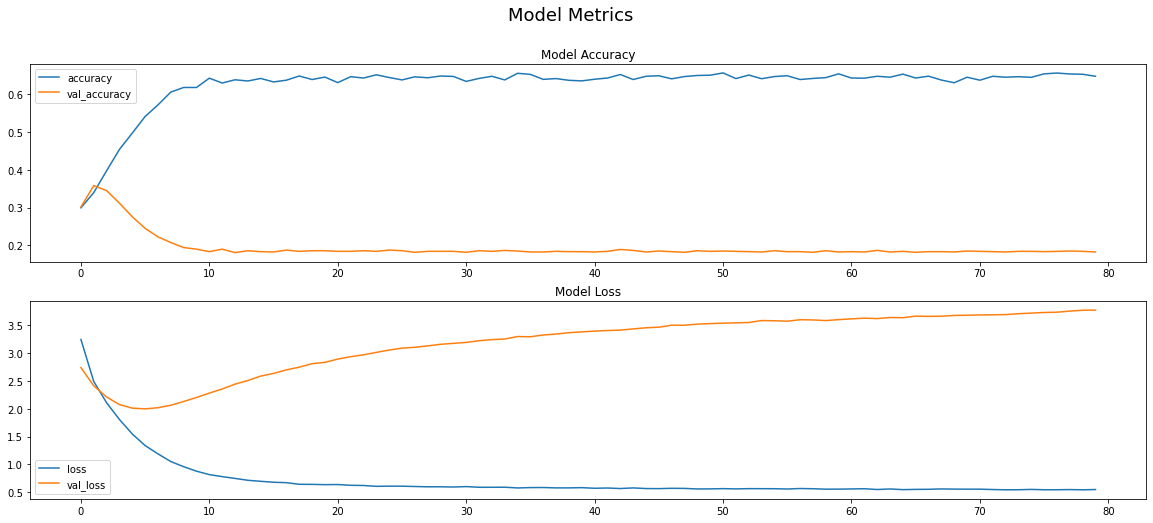

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(20, 8))
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(ax=ax[0])
df[['loss', 'val_loss']].plot(ax=ax[1])
ax[0].set_title('Model Accuracy', fontsize=12)
ax[1].set_title('Model Loss', fontsize=12)
fig.suptitle('Model Metrics', fontsize=18);

In [ ]:
df.head(50)

,loss,accuracy,val_loss,val_accuracy
0,3.240875,0.299393,2.737522,0.301667
1,2.487288,0.339764,2.409944,0.358333
2,2.106173,0.397642,2.209931,0.345000
3,1.806341,0.454091,2.073287,0.311667
4,1.546221,0.497320,2.009843,0.275833
5,1.338201,0.541265,1.996750,0.245000
6,1.189592,0.571990,2.017417,0.222500
7,1.051671,0.605931,2.061423,0.207500
8,0.959490,0.618078,2.128971,0.194167
9,0.878884,0.618078,2.201030,0.190000


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
filepath = "model.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
rlp = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1)

model = Sequential()
model.add(
    Embedding(
        input_dim=config.VOCAB, output_dim=config.EMBEDDING_VECTOR_LENGTH, input_length=config.MAX_LEN
    )
)
model.add(
    Bidirectional(
        LSTM(config.N_LSTM_CELLS, return_sequences=True, recurrent_dropout=config.RECURRENT_DROPOUT)
    )
)
model.add(
    TimeDistributed(
        Dense(config.N_OUPUT, activation=config.OUTPUT_ACTIVATION)
    )
)
model.compile(loss=config.LOSS, optimizer=config.OPTIMIZER, metrics=config.METRICS)

model.summary()
plot_model(model, show_shapes=True)

In [ ]:
model = build_sequential1(X_train_tfidf.shape[1], len(encoder.classes_))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
plot_model(model, show_shapes=True)

batch_size=100
epochs=80

# checkpoint=ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only=False, mode='auto')

history=model.fit(np.array(X_train_tfidf), np.array(y_train_tfidf), batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.3)

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, Y_tfidf, test_size=0.2, random_state=42)
svm_classifier=svm.SVC()
svm_classifier.fit(X_train_tfidf, y_train_tfidf)
predictions = svm_classifier.predict(X_test_tfidf)
metrics.accuracy_score(predictions, y_test_tfidf)

In [ ]:
# tfidf_df['medical_specialty'].unique()
tfidf_df[['medical_specialty','Unnamed: 0']].groupby('medical_specialty').count()

,Unnamed: 0
medical_specialty,
Allergy / Immunology,7
Autopsy,8
Bariatrics,18
Cardiovascular / Pulmonary,372
Chiropractic,14
Consult - History and Phy.,516
Cosmetic / Plastic Surgery,27
Dentistry,27
Dermatology,29


In [ ]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDF['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 